## WeGo Data Introduction

In [1]:
import pandas as pd

In [2]:
wego = pd.read_csv("../data/Headway Data, 8-1-2023 to 9-30-2023.csv")

wego.head()

,CALENDAR_ID,SERVICE_ABBR,ADHERENCE_ID,DATE,ROUTE_ABBR,BLOCK_ABBR,OPERATOR,TRIP_ID,OVERLOAD_ID,ROUTE_DIRECTION_NAME,...,ACTUAL_HDWY,HDWY_DEV,ADJUSTED_EARLY_COUNT,ADJUSTED_LATE_COUNT,ADJUSTED_ONTIME_COUNT,STOP_CANCELLED,PREV_SCHED_STOP_CANCELLED,IS_RELIEF,DWELL_IN_MINS,SCHEDULED_LAYOVER_MINUTES
0,120230801,1,99457890,2023-08-01,22,2200,1040,345104,0,TO DOWNTOWN,...,NaN,NaN,0,0,1,0,0.0,0,6.500000,NaN
1,120230801,1,99457891,2023-08-01,22,2200,1040,345104,0,TO DOWNTOWN,...,NaN,NaN,0,0,1,0,0.0,0,0.000000,NaN
2,120230801,1,99457892,2023-08-01,22,2200,1040,345104,0,TO DOWNTOWN,...,NaN,NaN,0,0,1,0,0.0,0,0.000000,NaN
3,120230801,1,99457893,2023-08-01,22,2200,1040,345104,0,TO DOWNTOWN,...,NaN,NaN,0,0,1,0,NaN,0,0.000000,NaN
4,120230801,1,99457894,2023-08-01,22,2200,1040,345105,0,FROM DOWNTOWN,...,NaN,NaN,0,0,1,0,0.0,0,12.866666,5.0


In [3]:
wego.columns

Index(['CALENDAR_ID', 'SERVICE_ABBR', 'ADHERENCE_ID', 'DATE', 'ROUTE_ABBR',
       'BLOCK_ABBR', 'OPERATOR', 'TRIP_ID', 'OVERLOAD_ID',
       'ROUTE_DIRECTION_NAME', 'TIME_POINT_ABBR', 'ROUTE_STOP_SEQUENCE',
       'TRIP_EDGE', 'LATITUDE', 'LONGITUDE', 'SCHEDULED_TIME',
       'ACTUAL_ARRIVAL_TIME', 'ACTUAL_DEPARTURE_TIME', 'ADHERENCE',
       'SCHEDULED_HDWY', 'ACTUAL_HDWY', 'HDWY_DEV', 'ADJUSTED_EARLY_COUNT',
       'ADJUSTED_LATE_COUNT', 'ADJUSTED_ONTIME_COUNT', 'STOP_CANCELLED',
       'PREV_SCHED_STOP_CANCELLED', 'IS_RELIEF', 'DWELL_IN_MINS',
       'SCHEDULED_LAYOVER_MINUTES'],
      dtype='object')

In the data, the bus route can be identified by its ROUTE_ABBR value.  
**3:** West End  
**7:** Hillsboro  
**22:** Bordeaux  
**23:** Dickerson Pike  
**50:** Charlotte Pike  
**52:** Nolensville Pike  
**55:** Murfreesboro Pike  
**56:** Gallatin Pike

In [4]:
wego['ROUTE_ABBR'].value_counts().sort_index()

ROUTE_ABBR
3     47162
7     18026
22    25959
23    42108
50    43291
52    51819
55    61944
56    60020
Name: count, dtype: int64

The trip can be identified by the DATE/CALENDAR_ID plus the TRIP_ID.  
**Warning:** The TRIP_ID refers to the route and time but will be used across multiple days.

The data contains multiple **time points** for each trip. There are more stops along the route than time points, but the time points are the points with specific scheduled times the bus operators must adhere to.

The first stop of a trip has a TRIP_EDGE of 1, the last has a TRIP_EDGE of 2, and the intermediate stops are TRIP_EDGE 0. 

Here is the first trip in the dataset. It was a Bordeaux route (Route 22), scheduled to start at 4:42:00 and end at 5:10:00.

In [5]:
wego[['DATE', 'CALENDAR_ID', 'TRIP_ID', 'ROUTE_ABBR', 'TIME_POINT_ABBR', 'TRIP_EDGE', 'SCHEDULED_TIME']].loc[:3]

,DATE,CALENDAR_ID,TRIP_ID,ROUTE_ABBR,TIME_POINT_ABBR,TRIP_EDGE,SCHEDULED_TIME
0,2023-08-01,120230801,345104,22,MHSP,1,2023-08-01 04:42:00
1,2023-08-01,120230801,345104,22,ELIZ,0,2023-08-01 04:46:00
2,2023-08-01,120230801,345104,22,CV23,0,2023-08-01 04:54:00
3,2023-08-01,120230801,345104,22,MCC5_10,2,2023-08-01 05:10:00


Note that the same TRIP_ID appears on the following day.

In [6]:
(
    wego
    .loc[wego['DATE'].astype(str).isin(['2023-08-01', '2023-08-02'])]
    .loc[wego['TRIP_ID'] == 345104]
    [['DATE', 'ROUTE_ABBR', 'TRIP_ID', 'TIME_POINT_ABBR', 'TRIP_EDGE', 'ROUTE_DIRECTION_NAME', 'SCHEDULED_TIME', 'ROUTE_STOP_SEQUENCE']]
)

,DATE,ROUTE_ABBR,TRIP_ID,TIME_POINT_ABBR,TRIP_EDGE,ROUTE_DIRECTION_NAME,SCHEDULED_TIME,ROUTE_STOP_SEQUENCE
0,2023-08-01,22,345104,MHSP,1,TO DOWNTOWN,2023-08-01 04:42:00,14.0
1,2023-08-01,22,345104,ELIZ,0,TO DOWNTOWN,2023-08-01 04:46:00,10.0
2,2023-08-01,22,345104,CV23,0,TO DOWNTOWN,2023-08-01 04:54:00,5.0
3,2023-08-01,22,345104,MCC5_10,2,TO DOWNTOWN,2023-08-01 05:10:00,1.0
6461,2023-08-02,22,345104,MHSP,1,TO DOWNTOWN,2023-08-02 04:42:00,14.0
6462,2023-08-02,22,345104,ELIZ,0,TO DOWNTOWN,2023-08-02 04:46:00,10.0
6463,2023-08-02,22,345104,CV23,0,TO DOWNTOWN,2023-08-02 04:54:00,5.0
6464,2023-08-02,22,345104,MCC5_10,2,TO DOWNTOWN,2023-08-02 05:10:00,1.0


**Adherence** refers to the difference between scheduled time and the actual time that the bus departs from a stop.

A negative value for ADHERENCE indicates that the bus is late, and a positive indicates that the bus is early.

Generally, an adherence value less than -6 is considered late, and greater than 1 is considered early, but there are some exceptions. For example, a positive adherence for the end of a trip (TRIP_EDGE 2) is not considered early, since it is not a problem if a bus ends its trip early as long as it didn't pass other timepoints early along the way. You can check whether a trip was considered on-time, early, or late using the ADJUSTED_EARLY_COUNT, ADJUSTED_LATE_COUNT, and ADJUSTED_ONTIME_COUNT columns.

Here is an example of a trip where all time points would be considered to be on time. Notice that at the end of the trip, the bus was more than 6 minutes early, but was still counted as on-time since this was a trip edge of 2.

In [7]:
(
    wego
    [[
        'DATE', 'CALENDAR_ID', 'TRIP_ID', 'ROUTE_ABBR',
        'TIME_POINT_ABBR', 'TRIP_EDGE',
        'SCHEDULED_TIME', 'ACTUAL_DEPARTURE_TIME', 'ADHERENCE',
        'ADJUSTED_EARLY_COUNT', 'ADJUSTED_LATE_COUNT', 'ADJUSTED_ONTIME_COUNT'
    ]]
    .loc[:3]
)

,DATE,CALENDAR_ID,TRIP_ID,ROUTE_ABBR,TIME_POINT_ABBR,TRIP_EDGE,SCHEDULED_TIME,ACTUAL_DEPARTURE_TIME,ADHERENCE,ADJUSTED_EARLY_COUNT,ADJUSTED_LATE_COUNT,ADJUSTED_ONTIME_COUNT
0,2023-08-01,120230801,345104,22,MHSP,1,2023-08-01 04:42:00,2023-08-01 04:44:08,-2.133333,0,0,1
1,2023-08-01,120230801,345104,22,ELIZ,0,2023-08-01 04:46:00,2023-08-01 04:48:27,-2.450000,0,0,1
2,2023-08-01,120230801,345104,22,CV23,0,2023-08-01 04:54:00,2023-08-01 04:54:56,-0.933333,0,0,1
3,2023-08-01,120230801,345104,22,MCC5_10,2,2023-08-01 05:10:00,2023-08-01 05:03:43,6.283333,0,0,1


And one that has one late stop.

In [8]:
(
    wego
    [[
        'DATE', 'CALENDAR_ID', 'TRIP_ID', 'ROUTE_ABBR',
        'TIME_POINT_ABBR', 'TRIP_EDGE',
        'SCHEDULED_TIME', 'ACTUAL_DEPARTURE_TIME', 'ADHERENCE',
        'ADJUSTED_EARLY_COUNT', 'ADJUSTED_LATE_COUNT', 'ADJUSTED_ONTIME_COUNT'
    ]]
    .loc[77:79]
)

,DATE,CALENDAR_ID,TRIP_ID,ROUTE_ABBR,TIME_POINT_ABBR,TRIP_EDGE,SCHEDULED_TIME,ACTUAL_DEPARTURE_TIME,ADHERENCE,ADJUSTED_EARLY_COUNT,ADJUSTED_LATE_COUNT,ADJUSTED_ONTIME_COUNT
77,2023-08-01,120230801,345127,22,MHSP,1,2023-08-01 17:05:00,2023-08-01 17:08:21,-3.350000,0,0,1
78,2023-08-01,120230801,345127,22,CV23,0,2023-08-01 17:14:00,2023-08-01 17:20:10,-6.166666,0,1,0
79,2023-08-01,120230801,345127,22,MCC5_10,2,2023-08-01 17:30:00,2023-08-01 17:30:23,-0.383333,0,0,1


And one which was early.

In [9]:
(
    wego
    [[
        'DATE', 'CALENDAR_ID', 'TRIP_ID', 'ROUTE_ABBR',
        'TIME_POINT_ABBR', 'TRIP_EDGE',
        'SCHEDULED_TIME', 'ACTUAL_DEPARTURE_TIME', 'ADHERENCE',
        'ADJUSTED_EARLY_COUNT', 'ADJUSTED_LATE_COUNT', 'ADJUSTED_ONTIME_COUNT'
    ]]
    .loc[11:13]
)

,DATE,CALENDAR_ID,TRIP_ID,ROUTE_ABBR,TIME_POINT_ABBR,TRIP_EDGE,SCHEDULED_TIME,ACTUAL_DEPARTURE_TIME,ADHERENCE,ADJUSTED_EARLY_COUNT,ADJUSTED_LATE_COUNT,ADJUSTED_ONTIME_COUNT
11,2023-08-01,120230801,345107,22,MCC5_10,1,2023-08-01 06:15:00,2023-08-01 06:16:19,-1.316666,0,0,1
12,2023-08-01,120230801,345107,22,CV23,0,2023-08-01 06:25:00,2023-08-01 06:23:30,1.500000,1,0,0
13,2023-08-01,120230801,345107,22,MHSP,2,2023-08-01 06:35:00,2023-08-01 06:30:59,4.016666,0,0,1


**Headway** is the amount of time between a bus and the prior bus at the same stop. In the dataset, the amount of headway scheduled is contained in the SCHEDULED_HDWY column and indicates the difference between the scheduled time for a particular stop and the scheduled time for the previous bus on that same stop.

This dataset contains a column HDWY_DEV, which shows the amount of deviation from the scheduled headway. **Bunching** occurs when there is shorter headway than scheduled, which would appear as a negative HDWY_DEV value. **Gapping** is when there is more headway than scheduled and appears as a positive value in the HDWY_DEV column. Note that you can calculate headway deviation percentage as HDWY_DEV/SCHEDULED_HDWY. 

The generally accepted range of headway deviation is 50% to 150% of the scheduled headway, so if scheduled headway is 10 minutes, a headway deviation of up to 5 minutes would be acceptable (but not ideal).

In [10]:
(
    wego
    .loc[wego['ROUTE_ABBR'] == 22]
    .loc[wego['ROUTE_DIRECTION_NAME'] == 'TO DOWNTOWN']
    .loc[wego['TIME_POINT_ABBR'] == 'CV23']
    [['DATE', 'TRIP_ID', 'TIME_POINT_ABBR','ROUTE_DIRECTION_NAME', 'TRIP_EDGE', 
      'SCHEDULED_TIME', 'SCHEDULED_HDWY',
      'ACTUAL_DEPARTURE_TIME', 'ACTUAL_HDWY', 'HDWY_DEV'
     ]]
    .sort_values(['DATE', 'SCHEDULED_TIME'])
    .iloc[:5]
)

,DATE,TRIP_ID,TIME_POINT_ABBR,ROUTE_DIRECTION_NAME,TRIP_EDGE,SCHEDULED_TIME,SCHEDULED_HDWY,ACTUAL_DEPARTURE_TIME,ACTUAL_HDWY,HDWY_DEV
2,2023-08-01,345104,CV23,TO DOWNTOWN,0,2023-08-01 04:54:00,NaN,2023-08-01 04:54:56,NaN,NaN
126,2023-08-01,345213,CV23,TO DOWNTOWN,0,2023-08-01 05:19:00,25.0,2023-08-01 05:18:59,24.050000,-0.950000
402,2023-08-01,345405,CV23,TO DOWNTOWN,0,2023-08-01 05:39:00,20.0,2023-08-01 05:39:40,20.683333,0.683333
9,2023-08-01,345106,CV23,TO DOWNTOWN,0,2023-08-01 05:54:00,15.0,2023-08-01 05:54:11,14.516666,-0.483334
316,2023-08-01,345377,CV23,TO DOWNTOWN,0,2023-08-01 06:09:00,15.0,2023-08-01 06:10:01,15.833333,0.833333


Two other columns that you've been asked to explore are the DWELL_IN_MINS column and SCHEDULED_LAYOVER_MINUTES, which shows the difference between actual arrival and actual departure time at a time point and the time a bus was scheduled to arrive at the time point and when it is scheduled to leave at the beginning of a trip.

Here, we can see the end of the first trip in the dataset and the beginning of the next trip, which goes in the opposite direction.

In [11]:
wego.loc[3:4, ['DATE', 'TRIP_ID', 'TRIP_EDGE', 'TIME_POINT_ABBR',
               'ACTUAL_ARRIVAL_TIME', 'ACTUAL_DEPARTURE_TIME', 'DWELL_IN_MINS', 'SCHEDULED_LAYOVER_MINUTES']]

,DATE,TRIP_ID,TRIP_EDGE,TIME_POINT_ABBR,ACTUAL_ARRIVAL_TIME,ACTUAL_DEPARTURE_TIME,DWELL_IN_MINS,SCHEDULED_LAYOVER_MINUTES
3,2023-08-01,345104,2,MCC5_10,2023-08-01 05:03:43,2023-08-01 05:03:43,0.000000,NaN
4,2023-08-01,345105,1,MCC5_10,2023-08-01 05:03:43,2023-08-01 05:16:35,12.866666,5.0


### 1. What is the overall on-time performance, and what do the overall distributions of adherence and headway deviation look like? 

In [12]:
pd.set_option('display.max_columns', None)

In [13]:
#df[df["col"] > 60]
#explore adherence and eliminate outliers more than 100 min early
wego[wego['ADHERENCE']< -100].sort_values('DATE')


,CALENDAR_ID,SERVICE_ABBR,ADHERENCE_ID,DATE,ROUTE_ABBR,BLOCK_ABBR,OPERATOR,TRIP_ID,OVERLOAD_ID,ROUTE_DIRECTION_NAME,TIME_POINT_ABBR,ROUTE_STOP_SEQUENCE,TRIP_EDGE,LATITUDE,LONGITUDE,SCHEDULED_TIME,ACTUAL_ARRIVAL_TIME,ACTUAL_DEPARTURE_TIME,ADHERENCE,SCHEDULED_HDWY,ACTUAL_HDWY,HDWY_DEV,ADJUSTED_EARLY_COUNT,ADJUSTED_LATE_COUNT,ADJUSTED_ONTIME_COUNT,STOP_CANCELLED,PREV_SCHED_STOP_CANCELLED,IS_RELIEF,DWELL_IN_MINS,SCHEDULED_LAYOVER_MINUTES
3231,120230801,1,99462269,2023-08-01,52,5204,1489,347283,0,FROM DOWNTOWN,HCKP,9.0,2,36.048934,-86.713854,2023-08-01 11:54:00,2023-08-01 15:55:42,2023-08-01 15:55:42,-241.700000,NaN,NaN,NaN,0,1,0,0,NaN,0,0.000000,NaN
3251,120230801,1,99462289,2023-08-01,52,5204,1542,347287,0,FROM DOWNTOWN,HCKP,9.0,2,36.048934,-86.713854,2023-08-01 15:57:00,2023-08-01 18:09:12,2023-08-01 18:09:12,-132.200000,NaN,NaN,NaN,0,1,0,0,NaN,0,0.000000,NaN
3250,120230801,1,99462288,2023-08-01,52,5204,1542,347287,0,FROM DOWNTOWN,WMRT,5.0,0,36.082309,-86.727340,2023-08-01 15:45:00,2023-08-01 17:58:57,2023-08-01 17:58:57,-133.950000,10.0,4.300000,-5.700000,0,1,0,0,0.0,0,0.000000,NaN
3249,120230801,1,99462287,2023-08-01,52,5204,1542,347287,0,FROM DOWNTOWN,THNV,4.0,0,36.111844,-86.745821,2023-08-01 15:33:00,2023-08-01 17:44:10,2023-08-01 17:46:08,-133.133333,10.0,5.283333,-4.716667,0,1,0,0,0.0,0,1.966666,NaN
3248,120230801,1,99462286,2023-08-01,52,5204,1542,347287,0,FROM DOWNTOWN,NVFG,3.0,0,36.135034,-86.759818,2023-08-01 15:26:00,2023-08-01 17:38:02,2023-08-01 17:38:02,-132.033333,10.0,8.350000,-1.650000,0,1,0,0,0.0,0,0.000000,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
330224,120230927,1,100317664,2023-09-27,52,5214,332,352271,0,TO DOWNTOWN,THNV,4.0,0,36.112037,-86.745666,2023-09-27 08:58:00,2023-09-27 10:59:03,2023-09-27 10:59:03,-121.050000,10.0,16.550000,6.550000,0,1,0,0,0.0,0,0.000000,NaN
329794,120230927,1,100317216,2023-09-27,52,5202,1800,352066,0,FROM DOWNTOWN,MCC4_19,2.0,1,36.167091,-86.781923,2023-09-27 19:55:00,2023-09-27 21:51:58,2023-09-27 22:00:54,-125.900000,20.0,21.616666,1.616666,0,1,0,1,0.0,0,8.933333,10.0
329793,120230927,1,100317215,2023-09-27,52,5202,1800,352065,0,TO DOWNTOWN,MCC4_19,2.0,2,36.167091,-86.781923,2023-09-27 19:45:00,2023-09-27 21:51:58,2023-09-27 21:51:58,-126.966666,NaN,NaN,NaN,0,1,0,1,NaN,0,0.000000,NaN
330225,120230927,1,100317665,2023-09-27,52,5214,332,352271,0,TO DOWNTOWN,NVFG,3.0,0,36.135392,-86.759737,2023-09-27 09:04:00,2023-09-27 11:03:09,2023-09-27 11:03:09,-119.150000,10.0,15.100000,5.100000,0,1,0,1,0.0,0,0.000000,NaN


In [14]:
wego[wego['ADHERENCE']< -100].sort_values('ADHERENCE')

,CALENDAR_ID,SERVICE_ABBR,ADHERENCE_ID,DATE,ROUTE_ABBR,BLOCK_ABBR,OPERATOR,TRIP_ID,OVERLOAD_ID,ROUTE_DIRECTION_NAME,TIME_POINT_ABBR,ROUTE_STOP_SEQUENCE,TRIP_EDGE,LATITUDE,LONGITUDE,SCHEDULED_TIME,ACTUAL_ARRIVAL_TIME,ACTUAL_DEPARTURE_TIME,ADHERENCE,SCHEDULED_HDWY,ACTUAL_HDWY,HDWY_DEV,ADJUSTED_EARLY_COUNT,ADJUSTED_LATE_COUNT,ADJUSTED_ONTIME_COUNT,STOP_CANCELLED,PREV_SCHED_STOP_CANCELLED,IS_RELIEF,DWELL_IN_MINS,SCHEDULED_LAYOVER_MINUTES
103162,120230818,1,99963004,2023-08-18,52,5202,1052,352052,0,FROM DOWNTOWN,MCC4_19,2.0,1,36.167091,-86.781923,2023-08-18 06:15:00,2023-08-18 06:07:02,2023-08-18 22:03:32,-948.533333,15.0,30.583333,15.583333,0,1,0,0,0.0,0,956.500000,8.0
19788,120230804,1,99559760,2023-08-04,22,2211,1743,350239,0,FROM DOWNTOWN,MCC5_10,1.0,1,36.167091,-86.781923,2023-08-04 07:00:00,2023-08-04 06:48:12,2023-08-04 18:15:00,-675.000000,15.0,8.233333,-6.766667,0,1,0,0,0.0,0,686.800000,5.0
340625,120230929,1,100377605,2023-09-29,23,2312,1394,350478,0,TO DOWNTOWN,DWMRT,5.0,1,36.244207,-86.760509,2023-09-29 05:37:00,2023-09-29 05:59:30,2023-09-29 15:55:10,-618.166666,12.0,13.683333,1.683333,0,1,0,0,0.0,0,595.666666,2.0
30377,120230806,3,99601907,2023-08-06,23,2311,2642,350455,0,TO DOWNTOWN,DWMRT,5.0,1,36.244207,-86.760509,2023-08-06 06:00:00,2023-08-06 06:26:26,2023-08-06 15:02:14,-542.233333,20.0,18.716666,-1.283334,0,1,0,0,0.0,0,515.800000,2.0
229460,120230910,3,100599172,2023-09-10,23,2311,2642,350455,0,TO DOWNTOWN,DWMRT,5.0,1,36.244207,-86.760509,2023-09-10 06:00:00,2023-09-10 06:26:36,2023-09-10 14:59:56,-539.933333,20.0,65.200000,45.200000,0,1,0,0,0.0,0,513.333333,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24490,120230804,1,99565680,2023-08-04,56,5601,1603,352789,0,TO DOWNTOWN,MCC4_18,6.0,2,36.167091,-86.781923,2023-08-04 09:05:00,2023-08-04 10:48:44,2023-08-04 10:48:44,-103.733333,NaN,NaN,NaN,0,1,0,1,NaN,0,0.000000,NaN
93538,120230816,1,99900948,2023-08-16,50,9950,2497,354098,0,TO DOWNTOWN,MCC5_11,4.0,2,36.167091,-86.781923,2023-08-16 15:37:00,2023-08-16 17:14:32,2023-08-16 17:19:42,-102.700000,NaN,NaN,NaN,0,1,0,0,NaN,0,5.166666,NaN
3242,120230801,1,99462280,2023-08-01,52,5204,1542,347286,0,TO DOWNTOWN,HCKP,9.0,1,36.048934,-86.713854,2023-08-01 14:14:00,2023-08-01 15:55:46,2023-08-01 15:55:46,-101.766666,25.0,4.616666,-20.383334,0,1,0,1,0.0,1,0.000000,NaN
253482,120230914,1,99948675,2023-09-14,23,2313,1368,350553,0,FROM DOWNTOWN,DWMRT,5.0,0,36.244207,-86.760509,2023-09-14 09:24:00,2023-09-14 11:04:50,2023-09-14 11:04:50,-100.833333,NaN,NaN,NaN,0,1,0,0,NaN,0,0.000000,NaN


In [15]:
#review of the adherence column
wego['ADHERENCE'].describe()

count    338861.000000
mean         -3.188796
std           6.898842
min        -948.533333
25%          -4.566666
50%          -2.000000
75%          -0.333333
max          88.383333
Name: ADHERENCE, dtype: float64

In [16]:
wego = wego[wego['PREV_SCHED_STOP_CANCELLED'] != 1]

wego = wego[wego['STOP_CANCELLED'] != 1]

wego = wego[wego['SCHEDULED_HDWY'] != 0]

In [17]:
#identify adherenence for buses no more than an hour late or early
wego_hour_range = wego[wego['ADHERENCE'].between(-60, 60)]

In [18]:
#eliminated about 300 stops
wego_hour_range['ADHERENCE'].describe()

count    333692.000000
mean         -3.068712
std           5.090951
min         -59.816666
25%          -4.533333
50%          -2.000000
75%          -0.333333
max          59.950000
Name: ADHERENCE, dtype: float64

In [19]:
from matplotlib import pyplot as plt

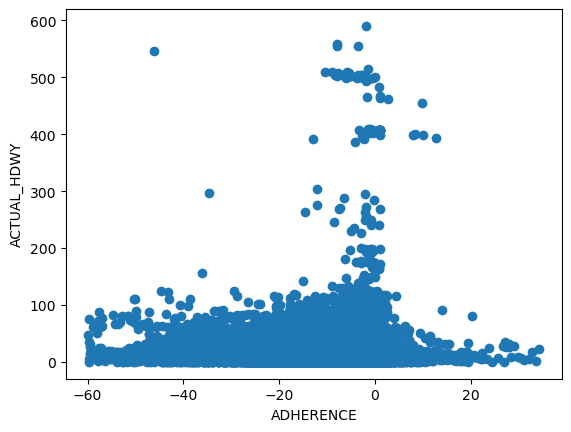

In [20]:
#create a scatter to show the incidence of adherance and the actual headway for buses within that hour early/late range
plt.scatter(wego_hour_range['ADHERENCE'], wego_hour_range['ACTUAL_HDWY'])
plt.ylabel('ACTUAL_HDWY')
plt.xlabel('ADHERENCE')
plt.show()


In [21]:
wego_on_time= wego_hour_range['ADJUSTED_ONTIME_COUNT'].sum()

In [22]:
wego_on_time

266564

In [23]:
wego_late = wego_hour_range['ADJUSTED_LATE_COUNT'].sum()

In [24]:
wego_early = wego_hour_range['ADJUSTED_EARLY_COUNT'].sum()

In [25]:
wego_late

57507

In [26]:
wego_early

9621

In [27]:
wego_all= wego_late + wego_early + wego_on_time
wego_all

333692

In [28]:
wego_timely_pct= wego_on_time/wego_all *100

In [29]:
wego_timely_pct.round(2)

79.88

In [30]:
wego_late_pct = wego_late/wego_all *100

In [31]:
wego_late_pct.round(2)

17.23

In [32]:
wego_early_pct = wego_early/wego_all *100

In [33]:
wego_early_pct.round(2)

2.88

([<matplotlib.patches.Wedge at 0x1925d704990>,
 [Text(-0.8852237485421215, 0.6529769636189588, 'on_time'),
  Text(0.4183966039377344, -1.0173221131054662, 'early'),
  Text(0.9406024061015062, -0.5703219385891246, 'late')],
 [Text(-0.4828493173866117, 0.3561692528830684, '79.8%'),
  Text(0.2282163294205824, -0.5549029707847997, '2.9%'),
  Text(0.5130558578735488, -0.31108469377588616, '17.4%')])

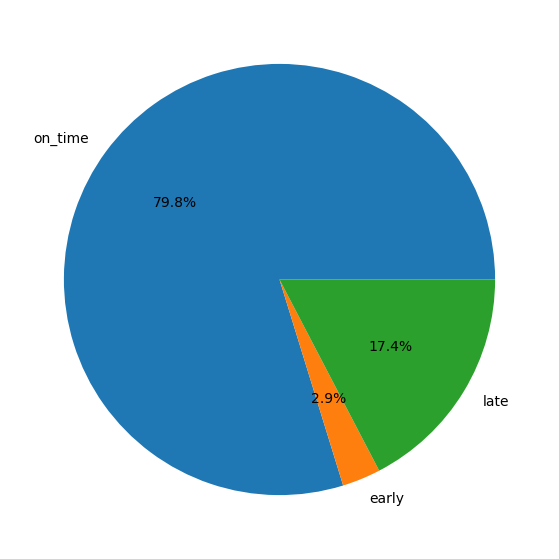

In [34]:
# from matplotlib import pyplot as plt
import numpy as np
# # Creating dataset
# cars = ['AUDI', 'BMW', 'FORD',
# 'TESLA', 'JAGUAR', 'MERCEDES']
# data = [23, 17, 35, 29, 12, 41]
# # Creating plot
# fig = plt.figure(figsize=(10, 7))
# plt.pie(data, labels=cars)
pieces = ['on_time','early', 'late']
data= [79.77, 2.88, 17.35]
fig = plt.figure(figsize=(10, 7))
plt.pie(data, labels = pieces, autopct='%1.1f%%')


### 2. How does direction of travel, route, or location affect the headway and on-time performance?

In [35]:
# (
# wego_hour_range
#     .loc[wego_hour_range['ROUTE_DIRECTION_NAME'] == 'TO DOWNTOWN']
#     [['DATE', 'TRIP_ID', 'TIME_POINT_ABBR','ROUTE_DIRECTION_NAME', 'TRIP_EDGE', 
#       'SCHEDULED_TIME', 'SCHEDULED_HDWY',
#       'ACTUAL_DEPARTURE_TIME', 'ACTUAL_HDWY', 'HDWY_DEV'
#      ]]
#     .value_counts('ADJUSTED_ONTIME_COUNT')
# )

#filter on travel 

wego_todt_ontime = wego_hour_range.loc[wego_hour_range['ROUTE_DIRECTION_NAME'] == 'TO DOWNTOWN'].loc[wego_hour_range['ADJUSTED_ONTIME_COUNT'] == 1].sort_values('HDWY_DEV', ascending=False)


### TO Downtown on time per Adjusted OnTime Count

In [36]:
#buses going toward downtown what were on time
wego_todt_ontime

,CALENDAR_ID,SERVICE_ABBR,ADHERENCE_ID,DATE,ROUTE_ABBR,BLOCK_ABBR,OPERATOR,TRIP_ID,OVERLOAD_ID,ROUTE_DIRECTION_NAME,TIME_POINT_ABBR,ROUTE_STOP_SEQUENCE,TRIP_EDGE,LATITUDE,LONGITUDE,SCHEDULED_TIME,ACTUAL_ARRIVAL_TIME,ACTUAL_DEPARTURE_TIME,ADHERENCE,SCHEDULED_HDWY,ACTUAL_HDWY,HDWY_DEV,ADJUSTED_EARLY_COUNT,ADJUSTED_LATE_COUNT,ADJUSTED_ONTIME_COUNT,STOP_CANCELLED,PREV_SCHED_STOP_CANCELLED,IS_RELIEF,DWELL_IN_MINS,SCHEDULED_LAYOVER_MINUTES
124778,120230822,1,100070737,2023-08-22,52,5218,2584,352309,0,TO DOWNTOWN,DCSCC,8.0,1,36.086817,-86.686874,2023-08-22 16:02:00,2023-08-22 15:30:45,2023-08-22 16:03:24,-1.400000,42.0,514.366666,472.366666,0,0,1,0,0.0,0,32.650000,NaN
262673,120230915,1,99982167,2023-09-15,52,5217,1394,352307,0,TO DOWNTOWN,DCSCC,8.0,1,36.086817,-86.686874,2023-09-15 15:20:00,2023-09-15 14:14:37,2023-09-15 15:19:02,0.966666,63.0,468.133333,405.133333,0,0,1,0,0.0,0,64.416666,NaN
70364,120230813,3,99799282,2023-08-13,22,2200,2793,350040,0,TO DOWNTOWN,MHSP,14.0,1,36.181248,-86.847705,2023-08-13 21:46:00,2023-08-13 21:36:20,2023-08-13 21:45:02,0.966666,30.0,268.983333,238.983333,0,0,1,0,0.0,0,8.700000,8.0
180973,120230901,1,100358403,2023-09-01,22,2200,2832,349970,0,TO DOWNTOWN,MHSP,14.0,1,36.181248,-86.847705,2023-09-01 23:43:00,2023-09-01 23:43:47,2023-09-01 23:43:47,-0.783333,60.0,249.750000,189.750000,0,0,1,0,0.0,0,0.000000,NaN
224,120230801,1,99458118,2023-08-01,22,2202,1190,345297,0,TO DOWNTOWN,CLFF,9.0,1,36.192856,-86.828554,2023-08-01 09:45:00,2023-08-01 09:37:14,2023-08-01 09:49:58,-4.966666,45.0,229.833333,184.833333,0,0,1,0,0.0,0,12.733333,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
350271,120230930,2,100406557,2023-09-30,7,702,572,353430,0,TO DOWNTOWN,MCC5_9,3.0,2,36.167091,-86.781923,2023-09-30 10:03:00,2023-09-30 09:58:17,2023-09-30 09:58:17,4.716666,NaN,NaN,NaN,0,0,1,0,NaN,0,0.000000,NaN
350277,120230930,2,100406563,2023-09-30,7,702,2103,353432,0,TO DOWNTOWN,MCC5_9,3.0,2,36.167091,-86.781923,2023-09-30 11:33:00,2023-09-30 11:29:19,2023-09-30 11:29:19,3.683333,NaN,NaN,NaN,0,0,1,0,NaN,0,0.000000,NaN
350283,120230930,2,100406569,2023-09-30,7,702,2103,353434,0,TO DOWNTOWN,MCC5_9,3.0,2,36.167091,-86.781923,2023-09-30 13:03:00,2023-09-30 13:02:34,2023-09-30 13:02:34,0.433333,NaN,NaN,NaN,0,0,1,0,NaN,0,0.000000,NaN
350289,120230930,2,100406575,2023-09-30,7,702,2103,353436,0,TO DOWNTOWN,MCC5_9,3.0,2,36.167091,-86.781923,2023-09-30 14:33:00,2023-09-30 14:31:47,2023-09-30 14:31:47,1.216666,NaN,NaN,NaN,0,0,1,0,NaN,0,0.000000,NaN


In [37]:
wego_todt_ontime.describe()

,CALENDAR_ID,SERVICE_ABBR,ADHERENCE_ID,ROUTE_ABBR,BLOCK_ABBR,OPERATOR,TRIP_ID,OVERLOAD_ID,ROUTE_STOP_SEQUENCE,TRIP_EDGE,LATITUDE,LONGITUDE,ADHERENCE,SCHEDULED_HDWY,ACTUAL_HDWY,HDWY_DEV,ADJUSTED_EARLY_COUNT,ADJUSTED_LATE_COUNT,ADJUSTED_ONTIME_COUNT,STOP_CANCELLED,PREV_SCHED_STOP_CANCELLED,IS_RELIEF,DWELL_IN_MINS,SCHEDULED_LAYOVER_MINUTES
count,1.333520e+05,133352.000000,1.333520e+05,133352.000000,133352.000000,133352.000000,133352.000000,133352.000000,133352.000000,133352.000000,133352.000000,133352.000000,133352.000000,103578.000000,103574.000000,103525.000000,133352.0,133352.0,133352.0,133352.0,105756.0,133352.000000,133352.000000,24363.000000
mean,1.202309e+08,1.297333,1.001049e+08,38.243663,3839.920811,1892.322830,351592.834101,0.001807,7.188426,0.633631,36.152901,-86.773436,-1.189224,18.744569,18.648815,-0.084227,0.0,0.0,1.0,0.0,0.0,0.002715,3.840133,16.037105
std,5.057420e+01,0.633192,3.233551e+05,20.431654,2053.530098,770.138413,1493.353289,0.051564,4.076503,0.803760,0.054979,0.066836,2.454820,11.979372,13.321247,5.314913,0.0,0.0,0.0,0.0,0.0,0.052031,8.313885,7.503956
min,1.202308e+08,1.000000,9.945789e+07,3.000000,300.000000,0.000000,345104.000000,0.000000,1.000000,0.000000,36.048934,-86.955657,-6.000000,5.000000,0.000000,-39.250000,0.0,0.0,1.0,0.0,0.0,0.000000,-12.766666,0.000000
25%,1.202308e+08,1.000000,9.989085e+07,22.000000,2210.000000,1361.000000,350925.000000,0.000000,4.000000,0.000000,36.125659,-86.814445,-2.750000,10.000000,11.166666,-1.983334,0.0,0.0,1.0,0.0,0.0,0.000000,0.000000,11.000000
50%,1.202308e+08,1.000000,1.001350e+08,50.000000,5005.000000,1914.000000,351953.000000,0.000000,6.000000,0.000000,36.152077,-86.781923,-1.216666,15.000000,15.916666,-0.100000,0.0,0.0,1.0,0.0,0.0,0.000000,0.000000,16.000000
75%,1.202309e+08,1.000000,1.003482e+08,55.000000,5505.000000,2534.000000,352641.000000,0.000000,10.000000,1.000000,36.175714,-86.726914,-0.050000,21.000000,22.816666,1.583333,0.0,0.0,1.0,0.0,0.0,0.000000,2.250000,20.000000
max,1.202309e+08,3.000000,1.007029e+08,56.000000,9975.000000,3173.000000,354106.000000,3.000000,17.000000,2.000000,36.300470,-86.636862,33.750000,407.000000,514.366666,472.366666,0.0,0.0,1.0,0.0,0.0,1.000000,262.900000,61.000000


In [38]:
wego_todt_timely = wego_hour_range.loc[wego_hour_range['ROUTE_DIRECTION_NAME'] == 'TO DOWNTOWN'].loc[wego_hour_range['ADJUSTED_ONTIME_COUNT'] == 1][['DATE', 'TRIP_ID', 'ROUTE_ABBR','ROUTE_DIRECTION_NAME', 'TRIP_EDGE', 
      'ADHERENCE','ACTUAL_HDWY','SCHEDULED_HDWY','HDWY_DEV']]  

In [39]:
wego_todt_timely=wego_todt_timely.dropna(subset=['ADHERENCE','ACTUAL_HDWY','SCHEDULED_HDWY'])

wego = wego[wego['PREV_SCHED_STOP_CANCELLED'] != 1]

wego = wego[wego['STOP_CANCELLED'] != 1]

wego = wego[wego['SCHEDULED_HDWY'] != 0]

In [40]:
wego_todt_timely[['DATE', 'TRIP_ID', 'ROUTE_ABBR','ROUTE_DIRECTION_NAME', 'TRIP_EDGE', 
      'ACTUAL_HDWY', 'HDWY_DEV']]

,DATE,TRIP_ID,ROUTE_ABBR,ROUTE_DIRECTION_NAME,TRIP_EDGE,ACTUAL_HDWY,HDWY_DEV
7,2023-08-01,345106,22,TO DOWNTOWN,1,37.666666,2.666666
8,2023-08-01,345106,22,TO DOWNTOWN,0,36.966666,1.966666
9,2023-08-01,345106,22,TO DOWNTOWN,0,14.516666,-0.483334
14,2023-08-01,345108,22,TO DOWNTOWN,1,59.800000,-0.200000
15,2023-08-01,345108,22,TO DOWNTOWN,0,60.083333,0.083333
...,...,...,...,...,...,...,...
350299,2023-09-30,353440,7,TO DOWNTOWN,1,32.400000,2.400000
350305,2023-09-30,353442,7,TO DOWNTOWN,1,29.800000,-0.200000
350306,2023-09-30,353442,7,TO DOWNTOWN,0,30.966666,0.966666
350311,2023-09-30,353444,7,TO DOWNTOWN,1,30.433333,0.433333


In [41]:
def BUNCH_GAP(wego_todt_timely):
    if wego_todt_timely['HDWY_DEV'] < 0:
        return "Bunching"
    elif wego_todt_timely['HDWY_DEV'] > 0:
        return "Gapping"
    else:
        return np.NaN

In [42]:
wego_todt_timely['BUNCH_GAP'] = wego_todt_timely.apply(BUNCH_GAP, axis=1)

In [43]:

wego_todt_timely['Bunching']= wego_todt_timely['HDWY_DEV'] < 0
wego_todt_timely['Gapping']= wego_todt_timely['HDWY_DEV'] > 0

In [44]:
wego_todt_timely['HDWY_PCT']= wego_todt_timely['ACTUAL_HDWY']/wego_todt_timely['SCHEDULED_HDWY']*100

In [45]:
wego_todt_timely['Acceptable']= wego_todt_timely['HDWY_PCT'].between(50, 150)



In [46]:
wego_todt_timely[['DATE', 'TRIP_ID', 'ROUTE_ABBR','ROUTE_DIRECTION_NAME', 'TRIP_EDGE', 
      'ACTUAL_HDWY', 'HDWY_DEV','HDWY_PCT','BUNCH_GAP','Bunching','Gapping', 'Acceptable']]

,DATE,TRIP_ID,ROUTE_ABBR,ROUTE_DIRECTION_NAME,TRIP_EDGE,ACTUAL_HDWY,HDWY_DEV,HDWY_PCT,BUNCH_GAP,Bunching,Gapping,Acceptable
7,2023-08-01,345106,22,TO DOWNTOWN,1,37.666666,2.666666,107.619046,Gapping,False,True,True
8,2023-08-01,345106,22,TO DOWNTOWN,0,36.966666,1.966666,105.619046,Gapping,False,True,True
9,2023-08-01,345106,22,TO DOWNTOWN,0,14.516666,-0.483334,96.777773,Bunching,True,False,True
14,2023-08-01,345108,22,TO DOWNTOWN,1,59.800000,-0.200000,99.666667,Bunching,True,False,True
15,2023-08-01,345108,22,TO DOWNTOWN,0,60.083333,0.083333,100.138888,Gapping,False,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...
350299,2023-09-30,353440,7,TO DOWNTOWN,1,32.400000,2.400000,108.000000,Gapping,False,True,True
350305,2023-09-30,353442,7,TO DOWNTOWN,1,29.800000,-0.200000,99.333333,Bunching,True,False,True
350306,2023-09-30,353442,7,TO DOWNTOWN,0,30.966666,0.966666,103.222220,Gapping,False,True,True
350311,2023-09-30,353444,7,TO DOWNTOWN,1,30.433333,0.433333,101.444443,Gapping,False,True,True


In [47]:
#sns.barplot(data=df, x='day', y='tip', hue='sex')
#plt.show()
import seaborn as sns
# sns.barplot(x = 'who',
#             y = 'fare',
#             data = df)
 
# # Show the plot
# plt.show()

In [48]:
#df.groupby(['cluster']).mean()
todt_timely_rts= wego_todt_timely.groupby(["ROUTE_ABBR"]).mean('HDWY_PCT')
todt_timely_rts


,TRIP_ID,TRIP_EDGE,ADHERENCE,ACTUAL_HDWY,SCHEDULED_HDWY,HDWY_DEV,Bunching,Gapping,HDWY_PCT,Acceptable
ROUTE_ABBR,,,,,,,,,,
3,350824.522530,0.235595,-1.989619,21.743910,21.620937,0.122972,0.513466,0.483361,100.449012,0.937848
7,353120.859671,0.529835,-1.830672,22.581135,22.932305,-0.351170,0.534979,0.460288,98.496191,0.962346
22,349836.137056,0.419258,-1.155216,30.911963,30.341688,0.570275,0.482709,0.502379,101.651515,0.967798
23,350105.910894,0.355070,-1.623689,17.180461,16.434598,0.745864,0.484423,0.511029,104.206795,0.934694
50,351526.396460,0.216202,-1.841302,19.139777,19.565705,-0.425928,0.532734,0.464225,97.672389,0.970475
52,351877.240500,0.221716,-1.723778,21.800900,21.672969,0.127931,0.508838,0.487960,99.804610,0.926156
55,352254.917716,0.245031,-2.152136,13.043710,13.713291,-0.669580,0.549365,0.447849,95.228879,0.864788
56,352677.289025,0.271483,-1.685940,13.788695,13.995555,-0.206860,0.511141,0.485244,98.701304,0.932915


<Axes: xlabel='ROUTE_ABBR', ylabel='HDWY_PCT'>

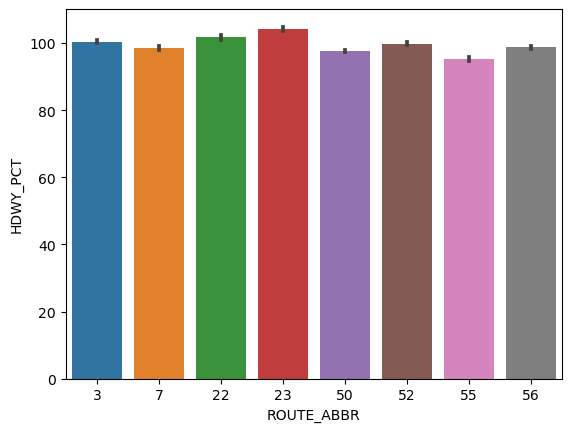

In [49]:
sns.barplot(data=wego_todt_timely, x="ROUTE_ABBR", y= 'HDWY_PCT')

In [50]:
#isolate the bus route numbers
wego_filter_rt= wego_todt_ontime.filter(items= ['ROUTE_ABBR'])

In [51]:
wego_filter_rt.value_counts()

ROUTE_ABBR
55            22692
56            21839
52            20176
3             18840
50            18371
23            14335
22            10347
7              6752
Name: count, dtype: int64

In [52]:
#explore why bus route 7 is the least on time
wego_7= wego_hour_range.loc[wego_hour_range['ROUTE_ABBR'] == 7]

In [53]:
#route 7 has 17325 entries to and from downtown
wego_7

,CALENDAR_ID,SERVICE_ABBR,ADHERENCE_ID,DATE,ROUTE_ABBR,BLOCK_ABBR,OPERATOR,TRIP_ID,OVERLOAD_ID,ROUTE_DIRECTION_NAME,TIME_POINT_ABBR,ROUTE_STOP_SEQUENCE,TRIP_EDGE,LATITUDE,LONGITUDE,SCHEDULED_TIME,ACTUAL_ARRIVAL_TIME,ACTUAL_DEPARTURE_TIME,ADHERENCE,SCHEDULED_HDWY,ACTUAL_HDWY,HDWY_DEV,ADJUSTED_EARLY_COUNT,ADJUSTED_LATE_COUNT,ADJUSTED_ONTIME_COUNT,STOP_CANCELLED,PREV_SCHED_STOP_CANCELLED,IS_RELIEF,DWELL_IN_MINS,SCHEDULED_LAYOVER_MINUTES
2123,120230801,1,99460956,2023-08-01,7,4101,907,346716,0,TO DOWNTOWN,HBHS,5.0,1,36.107575,-86.812719,2023-08-01 14:31:00,2023-08-01 14:31:27,2023-08-01 14:31:27,-0.450000,15.0,1.150000,-13.850000,0,0,1,0,0.0,0,0.000000,NaN
2124,120230801,1,99460957,2023-08-01,7,4101,907,346716,0,TO DOWNTOWN,21BK,4.0,0,36.138372,-86.800622,2023-08-01 14:41:00,2023-08-01 14:46:54,2023-08-01 14:46:54,-5.900000,15.0,5.950000,-9.050000,0,0,1,0,0.0,0,0.000000,NaN
2125,120230801,1,99460958,2023-08-01,7,4101,907,346716,0,TO DOWNTOWN,MCC5_12,2.0,2,36.167091,-86.781923,2023-08-01 15:00:00,2023-08-01 15:05:41,2023-08-01 15:05:41,-5.683333,NaN,NaN,NaN,0,0,1,0,NaN,0,0.000000,NaN
6136,120230801,1,99465617,2023-08-01,7,700,3144,348421,0,FROM DOWNTOWN,HBHS,5.0,2,36.107575,-86.812719,2023-08-01 05:40:00,2023-08-01 05:09:44,2023-08-01 05:09:44,30.266666,NaN,NaN,NaN,0,0,1,0,NaN,0,0.000000,NaN
6137,120230801,1,99465618,2023-08-01,7,700,3144,348422,0,TO DOWNTOWN,HBHS,5.0,1,36.107575,-86.812719,2023-08-01 05:46:00,2023-08-01 05:09:44,2023-08-01 05:11:45,34.250000,NaN,NaN,NaN,1,0,0,0,0.0,0,2.016666,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
350324,120230930,2,100406610,2023-09-30,7,702,2312,353448,0,TO DOWNTOWN,21BK,4.0,0,36.138372,-86.800622,2023-09-30 22:23:00,2023-09-30 22:31:26,2023-09-30 22:31:26,-8.433333,30.0,35.266666,5.266666,0,1,0,0,0.0,0,0.000000,NaN
350325,120230930,2,100406611,2023-09-30,7,702,2312,353448,0,TO DOWNTOWN,MCC5_9,3.0,2,36.167091,-86.781923,2023-09-30 22:38:00,2023-09-30 22:49:18,2023-09-30 22:49:18,-11.300000,NaN,NaN,NaN,0,1,0,0,NaN,0,0.000000,NaN
350326,120230930,2,100406612,2023-09-30,7,702,2312,353449,0,FROM DOWNTOWN,MCC5_9,3.0,1,36.167091,-86.781923,2023-09-30 22:45:00,2023-09-30 22:49:19,2023-09-30 22:49:19,-4.316666,30.0,31.866666,1.866666,0,0,1,0,0.0,0,0.000000,NaN
350327,120230930,2,100406613,2023-09-30,7,702,2312,353449,0,FROM DOWNTOWN,21BK,4.0,0,36.138881,-86.800622,2023-09-30 22:59:00,2023-09-30 23:21:05,2023-09-30 23:21:05,-22.083333,30.0,47.500000,17.500000,0,1,0,0,0.0,0,0.000000,NaN


In [54]:
#there are 6875 entries to downtown
wego_7_todt= wego_todt_ontime.loc[wego_hour_range['ROUTE_ABBR'] == 7]

In [55]:
wego_7_todt

,CALENDAR_ID,SERVICE_ABBR,ADHERENCE_ID,DATE,ROUTE_ABBR,BLOCK_ABBR,OPERATOR,TRIP_ID,OVERLOAD_ID,ROUTE_DIRECTION_NAME,TIME_POINT_ABBR,ROUTE_STOP_SEQUENCE,TRIP_EDGE,LATITUDE,LONGITUDE,SCHEDULED_TIME,ACTUAL_ARRIVAL_TIME,ACTUAL_DEPARTURE_TIME,ADHERENCE,SCHEDULED_HDWY,ACTUAL_HDWY,HDWY_DEV,ADJUSTED_EARLY_COUNT,ADJUSTED_LATE_COUNT,ADJUSTED_ONTIME_COUNT,STOP_CANCELLED,PREV_SCHED_STOP_CANCELLED,IS_RELIEF,DWELL_IN_MINS,SCHEDULED_LAYOVER_MINUTES
114418,120230820,3,100012923,2023-08-20,7,702,2312,353470,0,TO DOWNTOWN,HBHS,5.0,1,36.107575,-86.812719,2023-08-20 21:16:00,2023-08-20 21:18:32,2023-08-20 21:20:47,-4.783333,28.0,65.666666,37.666666,0,0,1,0,0.0,0,2.250000,5.0
59585,120230810,1,99724056,2023-08-10,7,705,2427,353518,0,TO DOWNTOWN,HBHS,5.0,1,36.107575,-86.812719,2023-08-10 17:40:00,2023-08-10 17:24:13,2023-08-10 17:41:53,-1.883333,15.0,50.950000,35.950000,0,0,1,0,0.0,0,17.666666,18.0
59586,120230810,1,99724057,2023-08-10,7,705,2427,353518,0,TO DOWNTOWN,21BK,4.0,0,36.138372,-86.800622,2023-08-10 17:49:00,2023-08-10 17:49:01,2023-08-10 17:49:01,-0.016666,15.0,49.183333,34.183333,0,0,1,0,0.0,0,0.000000,NaN
114412,120230820,3,100012917,2023-08-20,7,702,2312,353468,0,TO DOWNTOWN,HBHS,5.0,1,36.107575,-86.812719,2023-08-20 20:11:00,2023-08-20 19:48:49,2023-08-20 20:15:07,-4.116666,30.0,63.166666,33.166666,0,0,1,0,0.0,0,26.300000,25.0
273262,120230917,3,100030139,2023-09-17,7,702,2312,353466,0,TO DOWNTOWN,21BK,4.0,0,36.138372,-86.800622,2023-09-17 18:45:00,2023-09-17 18:50:23,2023-09-17 18:50:23,-5.383333,30.0,63.166666,33.166666,0,0,1,0,0.0,0,0.000000,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
350271,120230930,2,100406557,2023-09-30,7,702,572,353430,0,TO DOWNTOWN,MCC5_9,3.0,2,36.167091,-86.781923,2023-09-30 10:03:00,2023-09-30 09:58:17,2023-09-30 09:58:17,4.716666,NaN,NaN,NaN,0,0,1,0,NaN,0,0.000000,NaN
350277,120230930,2,100406563,2023-09-30,7,702,2103,353432,0,TO DOWNTOWN,MCC5_9,3.0,2,36.167091,-86.781923,2023-09-30 11:33:00,2023-09-30 11:29:19,2023-09-30 11:29:19,3.683333,NaN,NaN,NaN,0,0,1,0,NaN,0,0.000000,NaN
350283,120230930,2,100406569,2023-09-30,7,702,2103,353434,0,TO DOWNTOWN,MCC5_9,3.0,2,36.167091,-86.781923,2023-09-30 13:03:00,2023-09-30 13:02:34,2023-09-30 13:02:34,0.433333,NaN,NaN,NaN,0,0,1,0,NaN,0,0.000000,NaN
350289,120230930,2,100406575,2023-09-30,7,702,2103,353436,0,TO DOWNTOWN,MCC5_9,3.0,2,36.167091,-86.781923,2023-09-30 14:33:00,2023-09-30 14:31:47,2023-09-30 14:31:47,1.216666,NaN,NaN,NaN,0,0,1,0,NaN,0,0.000000,NaN


In [56]:
wego_7_todt.value_counts('ROUTE_ABBR')

ROUTE_ABBR
7    6752
Name: count, dtype: int64

In [57]:
wego_todt_ontime = wego_todt_ontime.dropna(subset=['ADHERENCE','ACTUAL_HDWY','SCHEDULED_HDWY'])

In [58]:
wego_7_total= wego_hour_range.loc[wego_hour_range['ROUTE_ABBR']==7].loc[wego_hour_range['ROUTE_DIRECTION_NAME'] == 'TO DOWNTOWN']


In [59]:
#there are 8225 total routes 
wego_7_total

,CALENDAR_ID,SERVICE_ABBR,ADHERENCE_ID,DATE,ROUTE_ABBR,BLOCK_ABBR,OPERATOR,TRIP_ID,OVERLOAD_ID,ROUTE_DIRECTION_NAME,TIME_POINT_ABBR,ROUTE_STOP_SEQUENCE,TRIP_EDGE,LATITUDE,LONGITUDE,SCHEDULED_TIME,ACTUAL_ARRIVAL_TIME,ACTUAL_DEPARTURE_TIME,ADHERENCE,SCHEDULED_HDWY,ACTUAL_HDWY,HDWY_DEV,ADJUSTED_EARLY_COUNT,ADJUSTED_LATE_COUNT,ADJUSTED_ONTIME_COUNT,STOP_CANCELLED,PREV_SCHED_STOP_CANCELLED,IS_RELIEF,DWELL_IN_MINS,SCHEDULED_LAYOVER_MINUTES
2123,120230801,1,99460956,2023-08-01,7,4101,907,346716,0,TO DOWNTOWN,HBHS,5.0,1,36.107575,-86.812719,2023-08-01 14:31:00,2023-08-01 14:31:27,2023-08-01 14:31:27,-0.450000,15.0,1.150000,-13.850000,0,0,1,0,0.0,0,0.000000,NaN
2124,120230801,1,99460957,2023-08-01,7,4101,907,346716,0,TO DOWNTOWN,21BK,4.0,0,36.138372,-86.800622,2023-08-01 14:41:00,2023-08-01 14:46:54,2023-08-01 14:46:54,-5.900000,15.0,5.950000,-9.050000,0,0,1,0,0.0,0,0.000000,NaN
2125,120230801,1,99460958,2023-08-01,7,4101,907,346716,0,TO DOWNTOWN,MCC5_12,2.0,2,36.167091,-86.781923,2023-08-01 15:00:00,2023-08-01 15:05:41,2023-08-01 15:05:41,-5.683333,NaN,NaN,NaN,0,0,1,0,NaN,0,0.000000,NaN
6137,120230801,1,99465618,2023-08-01,7,700,3144,348422,0,TO DOWNTOWN,HBHS,5.0,1,36.107575,-86.812719,2023-08-01 05:46:00,2023-08-01 05:09:44,2023-08-01 05:11:45,34.250000,NaN,NaN,NaN,1,0,0,0,0.0,0,2.016666,6.0
6139,120230801,1,99465620,2023-08-01,7,700,3144,348422,0,TO DOWNTOWN,MCC5_9,3.0,2,36.167091,-86.781923,2023-08-01 06:10:00,2023-08-01 05:20:00,2023-08-01 05:20:00,50.000000,NaN,NaN,NaN,1,0,0,0,NaN,0,0.000000,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
350317,120230930,2,100406603,2023-09-30,7,702,2312,353446,0,TO DOWNTOWN,HBHS,5.0,1,36.107575,-86.812719,2023-09-30 21:16:00,2023-09-30 21:12:40,2023-09-30 21:16:51,-0.850000,28.0,26.066666,-1.933334,0,0,1,0,0.0,0,4.183333,5.0
350318,120230930,2,100406604,2023-09-30,7,702,2312,353446,0,TO DOWNTOWN,21BK,4.0,0,36.138372,-86.800622,2023-09-30 21:23:00,2023-09-30 21:30:00,2023-09-30 21:30:00,-7.000000,28.0,31.566666,3.566666,0,1,0,0,0.0,0,0.000000,NaN
350323,120230930,2,100406609,2023-09-30,7,702,2312,353448,0,TO DOWNTOWN,HBHS,5.0,1,36.107575,-86.812719,2023-09-30 22:16:00,2023-09-30 22:22:39,2023-09-30 22:24:37,-8.616666,30.0,34.916666,4.916666,0,1,0,0,0.0,0,1.966666,5.0
350324,120230930,2,100406610,2023-09-30,7,702,2312,353448,0,TO DOWNTOWN,21BK,4.0,0,36.138372,-86.800622,2023-09-30 22:23:00,2023-09-30 22:31:26,2023-09-30 22:31:26,-8.433333,30.0,35.266666,5.266666,0,1,0,0,0.0,0,0.000000,NaN


### TO Downtown NOT on time per Adjusted OnTime Count

In [60]:
wego_todt_untimely = wego_hour_range.loc[wego_hour_range['ROUTE_DIRECTION_NAME'] == 'TO DOWNTOWN'].loc[wego_hour_range['ADJUSTED_ONTIME_COUNT'] != 1][['DATE', 'TRIP_ID', 'ROUTE_ABBR','ROUTE_DIRECTION_NAME', 'TRIP_EDGE', 
      'ADHERENCE','ACTUAL_HDWY','SCHEDULED_HDWY','HDWY_DEV']]    
 

In [61]:
#wego_trim = wego_trim.dropna(subset=['ADHERENCE','ACTUAL_HDWY','SCHEDULED_HDWY'])
wego_todt_untimely= wego_todt_untimely.dropna(subset=['ADHERENCE','ACTUAL_HDWY','SCHEDULED_HDWY'])

In [62]:
def BUNCH_GAP(wego_todt_untimely):
    if wego_todt_untimely['HDWY_DEV'] < 0:
        return "Bunching"
    elif wego_todt_untimely['HDWY_DEV'] > 0:
        return "Gapping"
    else:
        return np.NaN

In [63]:
wego_todt_untimely['BUNCH_GAP'] = wego_todt_untimely.apply(BUNCH_GAP, axis=1)

In [64]:
wego_todt_untimely['Bunching']= wego_todt_untimely['HDWY_DEV'] < 0
wego_todt_untimely['Gapping']= wego_todt_untimely['HDWY_DEV'] > 0

In [65]:
wego_todt_untimely['HDWY_PCT']= wego_todt_untimely['ACTUAL_HDWY']/wego_todt_untimely['SCHEDULED_HDWY']*100

In [66]:
wego_todt_untimely['Acceptable']= wego_todt_untimely['HDWY_PCT'].between(50, 150)

In [67]:
wego_todt_untimely[['DATE', 'TRIP_ID', 'ROUTE_ABBR','ROUTE_DIRECTION_NAME', 'TRIP_EDGE', 
      'ACTUAL_HDWY', 'HDWY_DEV','HDWY_PCT','BUNCH_GAP','Bunching','Gapping', 'Acceptable']]

,DATE,TRIP_ID,ROUTE_ABBR,ROUTE_DIRECTION_NAME,TRIP_EDGE,ACTUAL_HDWY,HDWY_DEV,HDWY_PCT,BUNCH_GAP,Bunching,Gapping,Acceptable
78,2023-08-01,345127,22,TO DOWNTOWN,0,16.683333,4.683333,139.027775,Gapping,False,True,True
91,2023-08-01,345131,22,TO DOWNTOWN,1,54.166666,4.166666,108.333332,Gapping,False,True,True
92,2023-08-01,345131,22,TO DOWNTOWN,0,30.816666,5.816666,123.266664,Gapping,False,True,True
104,2023-08-01,345135,22,TO DOWNTOWN,0,33.066666,3.066666,110.222220,Gapping,False,True,True
186,2023-08-01,345229,22,TO DOWNTOWN,0,4.616666,-7.383334,38.472217,Bunching,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
350300,2023-09-30,353440,7,TO DOWNTOWN,0,35.166666,5.166666,117.222220,Gapping,False,True,True
350312,2023-09-30,353444,7,TO DOWNTOWN,0,35.516666,5.516666,118.388887,Gapping,False,True,True
350318,2023-09-30,353446,7,TO DOWNTOWN,0,31.566666,3.566666,112.738093,Gapping,False,True,True
350323,2023-09-30,353448,7,TO DOWNTOWN,1,34.916666,4.916666,116.388887,Gapping,False,True,True


<Axes: xlabel='ROUTE_ABBR', ylabel='HDWY_PCT'>

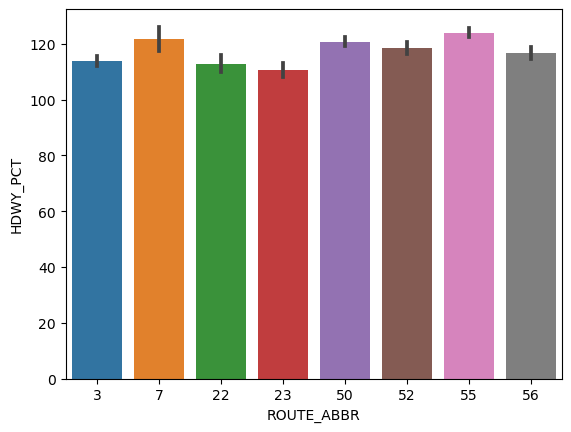

In [68]:
sns.barplot(data=wego_todt_untimely, x="ROUTE_ABBR", y= 'HDWY_PCT')

### From Downtown on time per Adjusted OnTime Count

In [69]:
wego_fmdt_ontime = wego_hour_range.loc[wego_hour_range['ROUTE_DIRECTION_NAME'] == 'FROM DOWNTOWN'].loc[wego_hour_range['ADJUSTED_ONTIME_COUNT'] == 1]

In [70]:
wego_fmdt_ontime[['DATE', 'TRIP_ID', 'ROUTE_ABBR','ROUTE_DIRECTION_NAME', 'TRIP_EDGE', 
      'ACTUAL_HDWY', 'HDWY_DEV']]

,DATE,TRIP_ID,ROUTE_ABBR,ROUTE_DIRECTION_NAME,TRIP_EDGE,ACTUAL_HDWY,HDWY_DEV
4,2023-08-01,345105,22,FROM DOWNTOWN,1,NaN,NaN
5,2023-08-01,345105,22,FROM DOWNTOWN,0,NaN,NaN
6,2023-08-01,345105,22,FROM DOWNTOWN,2,NaN,NaN
11,2023-08-01,345107,22,FROM DOWNTOWN,1,12.833333,-2.166667
13,2023-08-01,345107,22,FROM DOWNTOWN,2,NaN,NaN
...,...,...,...,...,...,...,...
350314,2023-09-30,353445,7,FROM DOWNTOWN,1,31.200000,1.200000
350315,2023-09-30,353445,7,FROM DOWNTOWN,0,30.316666,2.316666
350316,2023-09-30,353445,7,FROM DOWNTOWN,2,NaN,NaN
350320,2023-09-30,353447,7,FROM DOWNTOWN,1,36.716666,6.716666


In [71]:
import numpy as np

In [72]:
def BUNCH_GAP(wego_fmdt_ontime):
    if wego_fmdt_ontime['HDWY_DEV'] < 0:
        return "Bunching"
    elif wego_fmdt_ontime['HDWY_DEV'] > 0:
        return "Gapping"
    else:
        return np.NaN



In [73]:
wego_fmdt_ontime.apply(BUNCH_GAP, axis=1)

4              NaN
5              NaN
6              NaN
11        Bunching
13             NaN
            ...   
350314     Gapping
350315     Gapping
350316         NaN
350320     Gapping
350326     Gapping
Length: 133212, dtype: object

In [74]:
wego_fmdt_ontime['BUNCH_GAP'] = wego_fmdt_ontime.apply(BUNCH_GAP, axis=1)

In [75]:
# conditions = [
#     (wego_fmdt_ontime['HDWY_DEV'] < 0),
#     (wego_fmdt_ontime['HDWY_DEV'] > 0)
# ]

# results = ["Bunching", "Gapping"]

# wego_fmdt_ontime['BUNCH_GAP']= np.select(conditions, results)

In [76]:
wego_fmdt_ontime['Bunching']= wego_fmdt_ontime['HDWY_DEV'] < 0
wego_fmdt_ontime['Gapping']= wego_fmdt_ontime['HDWY_DEV'] > 0

In [77]:
wego_fmdt_ontime.head()

,CALENDAR_ID,SERVICE_ABBR,ADHERENCE_ID,DATE,ROUTE_ABBR,BLOCK_ABBR,OPERATOR,TRIP_ID,OVERLOAD_ID,ROUTE_DIRECTION_NAME,TIME_POINT_ABBR,ROUTE_STOP_SEQUENCE,TRIP_EDGE,LATITUDE,LONGITUDE,SCHEDULED_TIME,ACTUAL_ARRIVAL_TIME,ACTUAL_DEPARTURE_TIME,ADHERENCE,SCHEDULED_HDWY,ACTUAL_HDWY,HDWY_DEV,ADJUSTED_EARLY_COUNT,ADJUSTED_LATE_COUNT,ADJUSTED_ONTIME_COUNT,STOP_CANCELLED,PREV_SCHED_STOP_CANCELLED,IS_RELIEF,DWELL_IN_MINS,SCHEDULED_LAYOVER_MINUTES,BUNCH_GAP,Bunching,Gapping
4,120230801,1,99457894,2023-08-01,22,2200,1040,345105,0,FROM DOWNTOWN,MCC5_10,1.0,1,36.167091,-86.781923,2023-08-01 05:15:00,2023-08-01 05:03:43,2023-08-01 05:16:35,-1.583333,NaN,NaN,NaN,0,0,1,0,0.0,0,12.866666,5.0,NaN,False,False
5,120230801,1,99457895,2023-08-01,22,2200,1040,345105,0,FROM DOWNTOWN,CV23,5.0,0,36.183480,-86.814220,2023-08-01 05:25:00,2023-08-01 05:24:03,2023-08-01 05:24:03,0.950000,NaN,NaN,NaN,0,0,1,0,0.0,0,0.000000,NaN,NaN,False,False
6,120230801,1,99457896,2023-08-01,22,2200,1040,345105,0,FROM DOWNTOWN,MHSP,14.0,2,36.181248,-86.847705,2023-08-01 05:32:00,2023-08-01 05:30:30,2023-08-01 05:30:30,1.500000,NaN,NaN,NaN,0,0,1,0,NaN,0,0.000000,NaN,NaN,False,False
11,120230801,1,99457901,2023-08-01,22,2200,1040,345107,0,FROM DOWNTOWN,MCC5_10,1.0,1,36.167091,-86.781923,2023-08-01 06:15:00,2023-08-01 06:05:31,2023-08-01 06:16:19,-1.316666,15.0,12.833333,-2.166667,0,0,1,0,0.0,0,10.800000,5.0,Bunching,True,False
13,120230801,1,99457903,2023-08-01,22,2200,1040,345107,0,FROM DOWNTOWN,MHSP,14.0,2,36.181248,-86.847705,2023-08-01 06:35:00,2023-08-01 06:30:59,2023-08-01 06:30:59,4.016666,NaN,NaN,NaN,0,0,1,0,NaN,0,0.000000,NaN,NaN,False,False


In [78]:
wego_fmdt_ontime['HDWY_PCT']= wego_fmdt_ontime['ACTUAL_HDWY']/wego_fmdt_ontime['SCHEDULED_HDWY']*100

In [79]:
wego_fmdt_ontime['Acceptable']= wego_fmdt_ontime['HDWY_PCT'].between(50, 150)

In [80]:
wego_fmdt_ontime[['DATE', 'TRIP_ID', 'ROUTE_ABBR','ROUTE_DIRECTION_NAME', 'TRIP_EDGE', 
      'ACTUAL_HDWY', 'HDWY_DEV','HDWY_PCT','BUNCH_GAP','Bunching','Gapping', 'Acceptable']]

,DATE,TRIP_ID,ROUTE_ABBR,ROUTE_DIRECTION_NAME,TRIP_EDGE,ACTUAL_HDWY,HDWY_DEV,HDWY_PCT,BUNCH_GAP,Bunching,Gapping,Acceptable
4,2023-08-01,345105,22,FROM DOWNTOWN,1,NaN,NaN,NaN,NaN,False,False,False
5,2023-08-01,345105,22,FROM DOWNTOWN,0,NaN,NaN,NaN,NaN,False,False,False
6,2023-08-01,345105,22,FROM DOWNTOWN,2,NaN,NaN,NaN,NaN,False,False,False
11,2023-08-01,345107,22,FROM DOWNTOWN,1,12.833333,-2.166667,85.555553,Bunching,True,False,True
13,2023-08-01,345107,22,FROM DOWNTOWN,2,NaN,NaN,NaN,NaN,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
350314,2023-09-30,353445,7,FROM DOWNTOWN,1,31.200000,1.200000,104.000000,Gapping,False,True,True
350315,2023-09-30,353445,7,FROM DOWNTOWN,0,30.316666,2.316666,108.273807,Gapping,False,True,True
350316,2023-09-30,353445,7,FROM DOWNTOWN,2,NaN,NaN,NaN,NaN,False,False,False
350320,2023-09-30,353447,7,FROM DOWNTOWN,1,36.716666,6.716666,122.388887,Gapping,False,True,True


In [81]:
wego_fmdt_ontime =wego_fmdt_ontime.dropna(subset=['ADHERENCE','ACTUAL_HDWY','SCHEDULED_HDWY'])

wego_fmdt_ontime

,CALENDAR_ID,SERVICE_ABBR,ADHERENCE_ID,DATE,ROUTE_ABBR,BLOCK_ABBR,OPERATOR,TRIP_ID,OVERLOAD_ID,ROUTE_DIRECTION_NAME,TIME_POINT_ABBR,ROUTE_STOP_SEQUENCE,TRIP_EDGE,LATITUDE,LONGITUDE,SCHEDULED_TIME,ACTUAL_ARRIVAL_TIME,ACTUAL_DEPARTURE_TIME,ADHERENCE,SCHEDULED_HDWY,ACTUAL_HDWY,HDWY_DEV,ADJUSTED_EARLY_COUNT,ADJUSTED_LATE_COUNT,ADJUSTED_ONTIME_COUNT,STOP_CANCELLED,PREV_SCHED_STOP_CANCELLED,IS_RELIEF,DWELL_IN_MINS,SCHEDULED_LAYOVER_MINUTES,BUNCH_GAP,Bunching,Gapping,HDWY_PCT,Acceptable
11,120230801,1,99457901,2023-08-01,22,2200,1040,345107,0,FROM DOWNTOWN,MCC5_10,1.0,1,36.167091,-86.781923,2023-08-01 06:15:00,2023-08-01 06:05:31,2023-08-01 06:16:19,-1.316666,15.0,12.833333,-2.166667,0,0,1,0,0.0,0,10.800000,5.0,Bunching,True,False,85.555553,True
18,120230801,1,99457908,2023-08-01,22,2200,1040,345109,0,FROM DOWNTOWN,MCC5_10,1.0,1,36.167091,-86.781923,2023-08-01 07:15:00,2023-08-01 07:05:49,2023-08-01 07:16:44,-1.733333,15.0,15.233333,0.233333,0,0,1,0,0.0,0,10.916666,5.0,Gapping,False,True,101.555553,True
19,120230801,1,99457909,2023-08-01,22,2200,1040,345109,0,FROM DOWNTOWN,CV23,5.0,0,36.183480,-86.814220,2023-08-01 07:25:00,2023-08-01 07:24:02,2023-08-01 07:24:02,0.966666,15.0,14.616666,-0.383334,0,0,1,0,0.0,0,0.000000,NaN,Bunching,True,False,97.444440,True
25,120230801,1,99457915,2023-08-01,22,2200,1040,345111,0,FROM DOWNTOWN,MCC5_10,1.0,1,36.167091,-86.781923,2023-08-01 08:15:00,2023-08-01 08:05:31,2023-08-01 08:18:01,-3.016666,15.0,14.833333,-0.166667,0,0,1,0,0.0,0,12.500000,5.0,Bunching,True,False,98.888887,True
26,120230801,1,99457916,2023-08-01,22,2200,1040,345111,0,FROM DOWNTOWN,CV23,5.0,0,36.183480,-86.814220,2023-08-01 08:25:00,2023-08-01 08:26:31,2023-08-01 08:26:31,-1.516666,15.0,14.850000,-0.150000,0,0,1,0,0.0,0,0.000000,NaN,Bunching,True,False,99.000000,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
350308,120230930,2,100406594,2023-09-30,7,702,2312,353443,0,FROM DOWNTOWN,MCC5_9,3.0,1,36.167091,-86.781923,2023-09-30 19:15:00,2023-09-30 19:06:51,2023-09-30 19:19:03,-4.050000,30.0,28.350000,-1.650000,0,0,1,0,0.0,0,12.200000,12.0,Bunching,True,False,94.500000,True
350314,120230930,2,100406600,2023-09-30,7,702,2312,353445,0,FROM DOWNTOWN,MCC5_9,3.0,1,36.167091,-86.781923,2023-09-30 20:45:00,2023-09-30 20:40:02,2023-09-30 20:48:17,-3.283333,30.0,31.200000,1.200000,0,0,1,0,0.0,0,8.250000,NaN,Gapping,False,True,104.000000,True
350315,120230930,2,100406601,2023-09-30,7,702,2312,353445,0,FROM DOWNTOWN,21BK,4.0,0,36.138881,-86.800622,2023-09-30 20:59:00,2023-09-30 21:02:20,2023-09-30 21:02:20,-3.333333,28.0,30.316666,2.316666,0,0,1,0,0.0,0,0.000000,NaN,Gapping,False,True,108.273807,True
350320,120230930,2,100406606,2023-09-30,7,702,2312,353447,0,FROM DOWNTOWN,MCC5_9,3.0,1,36.167091,-86.781923,2023-09-30 21:45:00,2023-09-30 21:43:52,2023-09-30 21:50:54,-5.900000,30.0,36.716666,6.716666,0,0,1,0,0.0,0,7.033333,NaN,Gapping,False,True,122.388887,True


In [82]:
wego_fmdt_ontime[['DATE', 'TRIP_ID', 'ROUTE_ABBR','ROUTE_DIRECTION_NAME', 'TRIP_EDGE', 
      'ACTUAL_HDWY', 'HDWY_DEV','BUNCH_GAP']]

,DATE,TRIP_ID,ROUTE_ABBR,ROUTE_DIRECTION_NAME,TRIP_EDGE,ACTUAL_HDWY,HDWY_DEV,BUNCH_GAP
11,2023-08-01,345107,22,FROM DOWNTOWN,1,12.833333,-2.166667,Bunching
18,2023-08-01,345109,22,FROM DOWNTOWN,1,15.233333,0.233333,Gapping
19,2023-08-01,345109,22,FROM DOWNTOWN,0,14.616666,-0.383334,Bunching
25,2023-08-01,345111,22,FROM DOWNTOWN,1,14.833333,-0.166667,Bunching
26,2023-08-01,345111,22,FROM DOWNTOWN,0,14.850000,-0.150000,Bunching
...,...,...,...,...,...,...,...,...
350308,2023-09-30,353443,7,FROM DOWNTOWN,1,28.350000,-1.650000,Bunching
350314,2023-09-30,353445,7,FROM DOWNTOWN,1,31.200000,1.200000,Gapping
350315,2023-09-30,353445,7,FROM DOWNTOWN,0,30.316666,2.316666,Gapping
350320,2023-09-30,353447,7,FROM DOWNTOWN,1,36.716666,6.716666,Gapping


<Axes: xlabel='ROUTE_ABBR', ylabel='HDWY_PCT'>

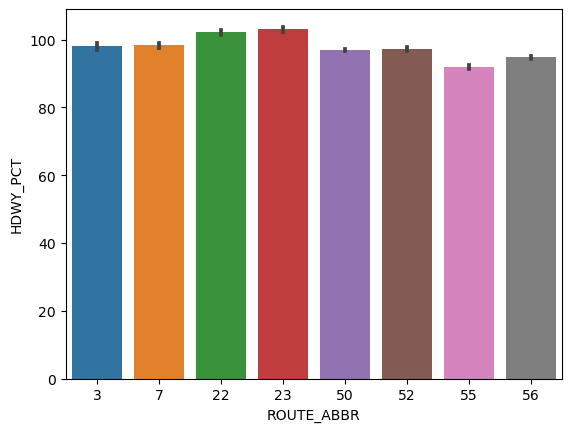

In [83]:
sns.barplot(data=wego_fmdt_ontime, x="ROUTE_ABBR", y= 'HDWY_PCT')

In [84]:
wego_fmdt_ontime_count= wego_fmdt_ontime.value_counts('ROUTE_ABBR')
wego_fmdt_ontime_count

ROUTE_ABBR
56    22006
55    15673
23    14503
50    14294
52    14128
3     12343
22     7670
7      4252
Name: count, dtype: int64

### From Downtown NOT on time per Adjustted OnTime Count

In [85]:
wego_fmdt_untimely = wego_hour_range.loc[wego_hour_range['ROUTE_DIRECTION_NAME'] == 'FROM DOWNTOWN'].loc[wego_hour_range['ADJUSTED_ONTIME_COUNT'] != 1][['DATE', 'TRIP_ID', 'ROUTE_ABBR','ROUTE_DIRECTION_NAME', 'TRIP_EDGE', 
      'ADHERENCE','ACTUAL_HDWY','SCHEDULED_HDWY','HDWY_DEV']]  

In [86]:
wego_fmdt_untimely

,DATE,TRIP_ID,ROUTE_ABBR,ROUTE_DIRECTION_NAME,TRIP_EDGE,ADHERENCE,ACTUAL_HDWY,SCHEDULED_HDWY,HDWY_DEV
12,2023-08-01,345107,22,FROM DOWNTOWN,0,1.500000,11.116666,15.0,-3.883334
32,2023-08-01,345113,22,FROM DOWNTOWN,0,1.266666,10.483333,16.0,-5.516667
38,2023-08-01,345115,22,FROM DOWNTOWN,0,1.883333,8.850000,12.0,-3.150000
69,2023-08-01,345124,22,FROM DOWNTOWN,2,-12.583333,NaN,NaN,NaN
83,2023-08-01,345128,22,FROM DOWNTOWN,0,-7.266666,45.016666,49.0,-3.983334
...,...,...,...,...,...,...,...,...,...
350304,2023-09-30,353441,7,FROM DOWNTOWN,2,-18.616666,NaN,NaN,NaN
350309,2023-09-30,353443,7,FROM DOWNTOWN,0,-7.883333,29.233333,30.0,-0.766667
350322,2023-09-30,353447,7,FROM DOWNTOWN,2,-11.650000,NaN,NaN,NaN
350327,2023-09-30,353449,7,FROM DOWNTOWN,0,-22.083333,47.500000,30.0,17.500000


In [87]:
wego_fmdt_untimely= wego_fmdt_untimely.dropna(subset=['ADHERENCE','ACTUAL_HDWY','SCHEDULED_HDWY'])

In [88]:
def BUNCH_GAP(wego_fmdt_untimely):
    if wego_fmdt_untimely['HDWY_DEV'] < 0:
        return "Bunching"
    elif wego_fmdt_untimely['HDWY_DEV'] > 0:
        return "Gapping"
    else:
        return np.NaN

In [89]:
wego_fmdt_untimely['BUNCH_GAP'] = wego_fmdt_untimely.apply(BUNCH_GAP, axis=1)

C:\Users\ymcmu\AppData\Local\Temp\ipykernel_8488\4164350772.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wego_fmdt_untimely['BUNCH_GAP'] = wego_fmdt_untimely.apply(BUNCH_GAP, axis=1)


In [90]:
wego_fmdt_untimely['Bunching']= wego_fmdt_untimely['HDWY_DEV'] < 0
wego_fmdt_untimely['Gapping']= wego_fmdt_untimely['HDWY_DEV'] > 0

C:\Users\ymcmu\AppData\Local\Temp\ipykernel_8488\238035992.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wego_fmdt_untimely['Bunching']= wego_fmdt_untimely['HDWY_DEV'] < 0
C:\Users\ymcmu\AppData\Local\Temp\ipykernel_8488\238035992.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wego_fmdt_untimely['Gapping']= wego_fmdt_untimely['HDWY_DEV'] > 0


In [91]:
wego_fmdt_untimely['HDWY_PCT']= wego_fmdt_untimely['ACTUAL_HDWY']/wego_fmdt_untimely['SCHEDULED_HDWY']*100

C:\Users\ymcmu\AppData\Local\Temp\ipykernel_8488\1880273310.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wego_fmdt_untimely['HDWY_PCT']= wego_fmdt_untimely['ACTUAL_HDWY']/wego_fmdt_untimely['SCHEDULED_HDWY']*100


In [92]:
wego_fmdt_untimely['Acceptable']= wego_fmdt_untimely['HDWY_PCT'].between(50, 150)

C:\Users\ymcmu\AppData\Local\Temp\ipykernel_8488\1552088843.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wego_fmdt_untimely['Acceptable']= wego_fmdt_untimely['HDWY_PCT'].between(50, 150)


In [93]:
wego_fmdt_untimely[['DATE', 'TRIP_ID', 'ROUTE_ABBR','ROUTE_DIRECTION_NAME', 'TRIP_EDGE', 
      'ACTUAL_HDWY', 'HDWY_DEV','HDWY_PCT','BUNCH_GAP','Bunching','Gapping', 'Acceptable']]

,DATE,TRIP_ID,ROUTE_ABBR,ROUTE_DIRECTION_NAME,TRIP_EDGE,ACTUAL_HDWY,HDWY_DEV,HDWY_PCT,BUNCH_GAP,Bunching,Gapping,Acceptable
12,2023-08-01,345107,22,FROM DOWNTOWN,0,11.116666,-3.883334,74.111107,Bunching,True,False,True
32,2023-08-01,345113,22,FROM DOWNTOWN,0,10.483333,-5.516667,65.520831,Bunching,True,False,True
38,2023-08-01,345115,22,FROM DOWNTOWN,0,8.850000,-3.150000,73.750000,Bunching,True,False,True
83,2023-08-01,345128,22,FROM DOWNTOWN,0,45.016666,-3.983334,91.870747,Bunching,True,False,True
94,2023-08-01,345132,22,FROM DOWNTOWN,1,37.316666,7.316666,124.388887,Gapping,False,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...
350297,2023-09-30,353439,7,FROM DOWNTOWN,0,30.100000,0.100000,100.333333,Gapping,False,True,True
350302,2023-09-30,353441,7,FROM DOWNTOWN,1,39.933333,9.933333,133.111110,Gapping,False,True,True
350303,2023-09-30,353441,7,FROM DOWNTOWN,0,44.500000,14.500000,148.333333,Gapping,False,True,True
350309,2023-09-30,353443,7,FROM DOWNTOWN,0,29.233333,-0.766667,97.444443,Bunching,True,False,True


<Axes: xlabel='ROUTE_ABBR', ylabel='HDWY_PCT'>

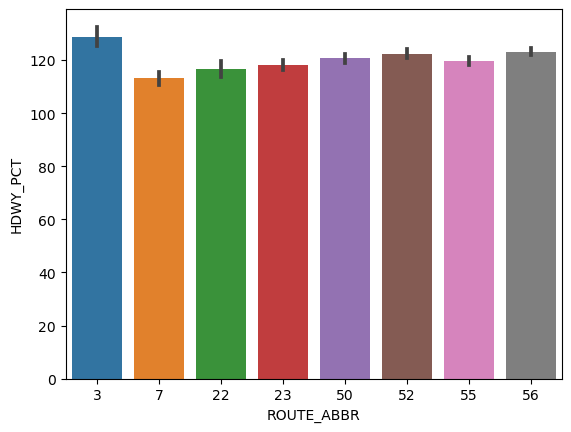

In [94]:
sns.barplot(data=wego_fmdt_untimely, x="ROUTE_ABBR", y= 'HDWY_PCT')